In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split


In [21]:
data1 =sklearn.datasets.fetch_california_housing()
data1

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
dataf=pd.DataFrame(data1.data,columns=data1.feature_names)
dataf['Price']=data1.target
dataf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [103]:
data=np.array(dataf)
x=data[:,0:8]
x.shape

X=np.ones((x.shape[0],x.shape[1]+1))
X[:,1:9]=x[:,:]
Y=data[:,8]
# X[:,1:2]=(X[:,1:2]/15)
# X[:,2:3]=X[:,2:3]/52
# X[:,3:4]=X[:,3:4]/141
# X[:,4:5]=X[:,4:5]/34
# X[:,5:6]=X[:,5:6]/35682
# X[:,6:7]=X[:,6:7]/1243
# X[:,7:8]=X[:,7:8]/41
# X[:,8:8]=X[:,8:8]/114
# print(X)
X=X.T
print(X.shape)
X

(9, 20640)


array([[   1.        ,    1.        ,    1.        , ...,    1.        ,
           1.        ,    1.        ],
       [   8.3252    ,    8.3014    ,    7.2574    , ...,    1.7       ,
           1.8672    ,    2.3886    ],
       [  41.        ,   21.        ,   52.        , ...,   17.        ,
          18.        ,   16.        ],
       ...,
       [   2.55555556,    2.10984183,    2.80225989, ...,    2.3256351 ,
           2.12320917,    2.61698113],
       [  37.88      ,   37.86      ,   37.85      , ...,   39.43      ,
          39.43      ,   39.37      ],
       [-122.23      , -122.22      , -122.24      , ..., -121.22      ,
        -121.32      , -121.24      ]])

In [104]:
def model(X,Y,iteration,alpha):
    theta=np.zeros(X.shape[0])
    h=np.dot(theta,X)
    m=X.shape[1]
    cost_list=[]
    for i in range(iteration):
        h=np.dot(theta,X)
        cost=1/(2*m)*np.sum((np.square(h-Y)))
        dtheta=np.sum(np.dot(X,(h-Y)))
        theta=theta-alpha*((1/m)*dtheta)
        cost_list.append(cost)
    return theta,cost_list

In [117]:
it=700
theta,cost_list=model(X,Y,it,0.0000005)

feature=np.array([1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23])
a=np.dot(feature,theta)
print(a)
theta

0.26507391096812494


array([0.0008879, 0.0008879, 0.0008879, 0.0008879, 0.0008879, 0.0008879,
       0.0008879, 0.0008879, 0.0008879])

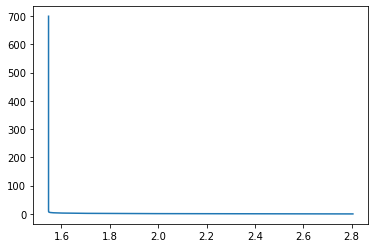

In [115]:
rng=np.arange(0,it)
plt.plot(cost_list,rng)
plt.show()